In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://github.com/nytimes/covid-19-data/blob/master/us-counties-2020.csv?raw=true'
df = pd.read_csv(url)

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df_first_wave = df[df['date'] < '06/30/2020']

In [6]:
treatment_states = ['Minnesota', 'Montana','Nevada','North Carolina','Rhode Island', 'Alabama','Arizona','Florida','Georgia','Kansas','Maine','Maryland','Mississippi','Missouri','New Hampshire','South Carolina','Tennesse','Texas','Utah','Virgina']

In [7]:
control_states = ['Arkansas','Iowa','Nebraska','North Dakota','Oklahoma', 'South Dakota', 'Wyoming']

In [8]:
treatment_df = df_first_wave[df_first_wave['state'].isin(treatment_states)]

In [9]:
control_df = df_first_wave[df_first_wave['state'].isin(control_states)]

In [10]:
control_df['Treatment'] = False

/tmp/ipykernel_5260/1425731934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_df['Treatment'] = False


In [11]:
treatment_df['Treatment'] = True

/tmp/ipykernel_5260/283517631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_df['Treatment'] = True


In [12]:
combined_df = pd.concat([control_df, treatment_df])

## Dropping values where 'county' is 'Unknown' as there is no way to impute. Losing 1157 records of 150050 initial total (0.77%)

In [13]:
#drop unknown county
combined_df = combined_df[combined_df['county'] != 'Unknown']

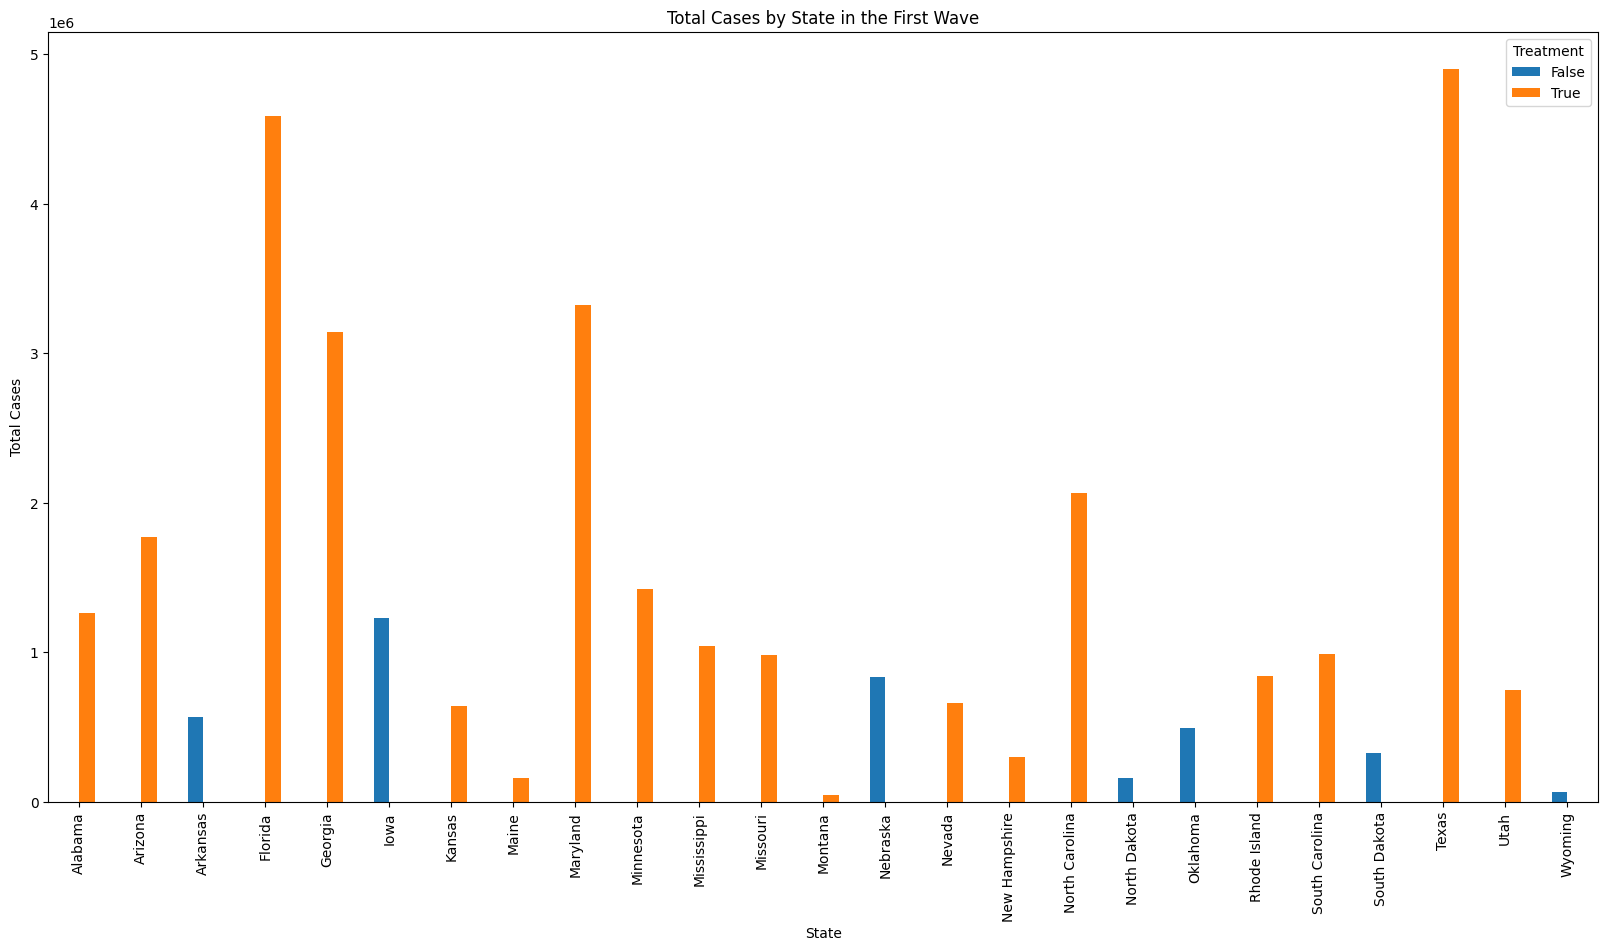

In [14]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['cases'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Cases by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.show()


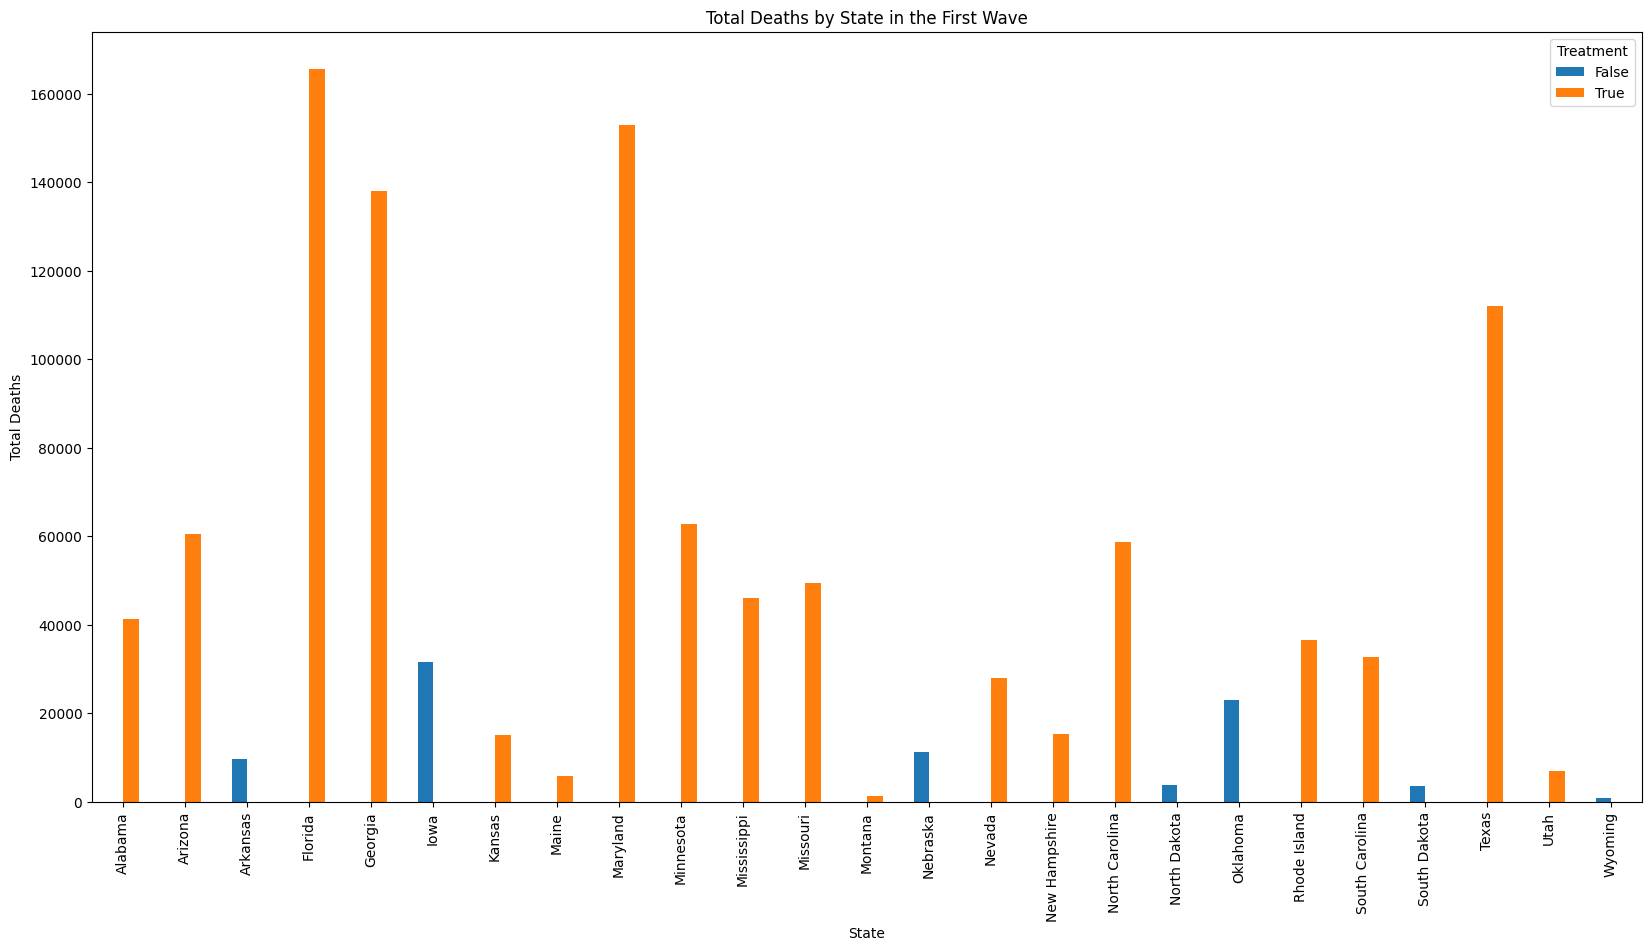

In [15]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['deaths'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Deaths by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.show()

In [16]:
import pandas as pd


df_new = combined_df.groupby(['state', 'county', 'Treatment']).apply(
    lambda x: pd.DataFrame({
        'date': pd.date_range(start='2020-01-01', end=x['date'].max(), freq='D'),
        'state': x['state'].iloc[0],
        'county': x['county'].iloc[0],
        'Treatment': x['Treatment'].iloc[0]
    })
).reset_index(drop=True)

combined_df = pd.merge(df_new, combined_df, on=['date', 'state', 'county', 'Treatment'], how='outer').fillna(0)



In [17]:
combined_df['state_and_county'] = combined_df['state'] + ' ' + combined_df['county']

In [18]:
#get list of unqiue state and county combinations
state_and_county_list = combined_df['state_and_county'].unique()

In [19]:
new_dataframe_please_work_2 = pd.DataFrame()

state_county_list = []
for state_county in state_and_county_list: 
    state_county_df = combined_df[combined_df['state_and_county'] == state_county]
    state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
    state_county_list.append(state_county_df)

df_with_deaths = pd.concat(state_county_list)

/tmp/ipykernel_5260/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
/tmp/ipykernel_5260/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
/tmp/ipykernel_5260/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [20]:
df_with_deaths = df_with_deaths[df_with_deaths['deaths_per_day'] >= 0]

In [21]:
state_county_list_cases = []
for state_county in state_and_county_list: 
    state_county_df = combined_df[combined_df['state_and_county'] == state_county]
    state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
    state_county_list_cases.append(state_county_df)

df_with_deaths_cases = pd.concat(state_county_list_cases)

df_with_deaths_cases = df_with_deaths_cases[df_with_deaths_cases['cases_per_day'] >= 0]

/tmp/ipykernel_5260/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
/tmp/ipykernel_5260/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
/tmp/ipykernel_5260/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [22]:
df_with_everything = pd.merge(df_with_deaths, df_with_deaths_cases, on=['date', 'state', 'county', 'Treatment'], how='right').fillna(0)

In [23]:
df_with_everything

,date,state,county,Treatment,fips_x,cases_x,deaths_x,state_and_county_x,deaths_per_day,fips_y,cases_y,deaths_y,state_and_county_y,cases_per_day
0,2020-01-02,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
1,2020-01-03,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
2,2020-01-04,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
3,2020-01-05,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
4,2020-01-06,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298042,2020-06-25,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
298043,2020-06-26,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
298044,2020-06-27,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
298045,2020-06-28,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0


In [24]:
df_final = df_with_everything[['date', 'state','cases_x', 'deaths_x', 'county','Treatment', 'fips_x', 'deaths_per_day', 'cases_per_day']]

In [25]:
#rename columns in df_final
df_final = df_final.rename(columns={'cases_x': 'cases', 'deaths_x': 'deaths', 'fips_x': 'fips'})


In [26]:
#write df_final to csv
df_final.to_csv('case_and_death_data.csv')